In [1]:
import ROOT
import pandas
import math
%matplotlib inline
import matplotlib #as matplot
print(matplotlib.__version__)
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import numpy as np
import time

Welcome to JupyROOT 6.12/07
2.2.3


In [2]:
from sklearn.metrics import roc_curve, auc
import pylab
import sklearn as sk
print(sk.__version__)
from sklearn.model_selection import train_test_split

0.19.1


In [3]:
import tensorflow as tf
print(tf.__version__)
######################
import keras as kr
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, Dropout
print(kr.__version__)
from keras import backend as K
import tensorflow as tf
print(tf.__version__)
config = tf.ConfigProto(intra_op_parallelism_threads=32, \
                        inter_op_parallelism_threads=32, \
                        allow_soft_placement=True, \
                        device_count = {'CPU': 6}
                       )
session = tf.Session(config=config)
K.set_session(session)

1.6.0
2.1.4
1.6.0


Using TensorFlow backend.
2019-07-15 12:39:36.775257: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2


In [4]:
%run dnn_utils/data_utils.py

vars = ['Lep1_pt', 'Lep1_eta', 'Lep1_phi','Lep2_pt', 'Lep2_eta', 'Lep2_phi',
        'Jet1_pt','Jet1_eta','Jet1_phi',#'Jet1_mass',
        'Jet2_pt','Jet2_eta','Jet2_phi',#'Jet2_mass',
        'HadTop_pt','HadTop_eta','HadTop_phi',
        'met','met_phi'                                  
                                         ]
target = ['Higgs_y']
data = load_data("tthreco/TTHnobb_pow_Friend.root",  vars + ['evt_tag'] + target
        )



In [5]:
# make the selection and slimming
data = data[data['evt_tag'] == 1]
data = data[vars+target]

# move to log
#data["Higgs_pt"] = np.log(data["Higgs_pt"])
#data["Higgs_pt"] = data["Higgs_pt"].apply(lambda x : min(x,450))
#print data["Higgs_pt"]

In [6]:
# train and validation
traindataset, valdataset = train_test_split(data, test_size=0.4, random_state=7)

In [7]:
# get them modules
from keras import optimizers
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler



In [8]:
def nn_model(lr=5e-2):
    "create a model."
    model = Sequential()
    model.add(Dense(3*len(vars), input_dim=len(vars), kernel_initializer='he_uniform')) 
    model.add(Activation('relu'))
    for Nnodes in [80,100,40,16,4] :
        model.add(Dense(Nnodes, kernel_initializer='he_uniform'))
        model.add(Activation('linear'))
    model.add(Dense(1, kernel_initializer='he_uniform'))
    model.add(Activation('relu'))
    
    adam = optimizers.adam(lr=lr) 
    model.compile(loss='mean_absolute_percentage_error', optimizer=adam)
    return model

def trainLR(lr,plot=False):
    k_model  = KerasRegressor(
        build_fn=nn_model, 
        epochs=20, 
        batch_size=100, 
        verbose=2,
        lr=lr
)

    history = k_model.fit(
        traindataset[vars].values, 
        traindataset[target].values,
        validation_data=(
            valdataset[vars].values, 
            valdataset[target].values
        )
    )
    return history
# predict validation

#    prediction = k_model.predict(valdataset[vars].values)
#    corr = np.corrcoef(prediction, np.transpose(valdataset[target].values[:]))
#    if plot:
#        plt.scatter(valdataset[target].values,prediction,s=0.01)
#    #diff = valdataset[target].values.reshape(-1)-prediction
#    #plt.hist(diff/prediction,log=False,bins=1000,range=[-3,3])

#    return corr[0,1], history



In [9]:
hist= trainLR(1e-4,plot=True)
plt.show()

Train on 51855 samples, validate on 34570 samples
Epoch 1/20
 - 4s - loss: 100.0134 - val_loss: 100.0000
Epoch 2/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 3/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 4/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 5/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 6/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 7/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 8/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 9/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 10/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 11/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 12/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 13/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 14/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 15/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 16/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 17/20
 - 2s - loss: 100.0000 - val_loss: 100.0000
Epoch 1

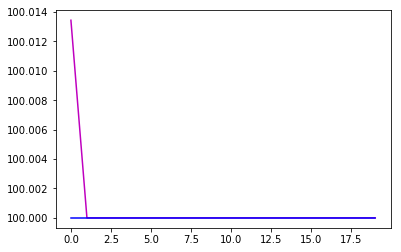

In [10]:
plt.plot(hist.history['loss'],color='m')
plt.plot(hist.history['val_loss'],color='b')
plt.show()

In [11]:
#x = []; y = []; 
#lrs = np.logspace(-8,-6,num=40)
#for lr in lrs: #
#   x.append(lr)
#    y.append(trainLR(lr))
#print x,y    

In [12]:
#plt.semilogx(x[0:5],y)
#plt.show()